## Dataset: Student Performance Dataset

Source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

## Problem Statement:
The goal of this project is to analyze how various factors (like study time, parental education, internet access, etc.) affect students’ academic performance. This mimics real-world decision-making in education and is easy to understand.

## Tools:
- Python (Pandas, Matplotlib/Seaborn, Scikit-learn)

- Jupyter Notebook 

- Exploratory Data Analysis (EDA)

- Data Cleaning

- Feature Engineering

- Model Building (Linear Regression)

In [1]:
# Importing of Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("StudentsPerformanceinExams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Data Cleaning: Checking for missing values
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [4]:
# Rename columns for consistency by replacing space with underscore
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

In [5]:
# Encode categorical variables
df['gender'] = df['gender'].map({'female': 0, 'male': 1})
df['lunch'] = df['lunch'].map({'standard': 1, 'free/reduced': 0})
df['test_preparation_course'] = df['test_preparation_course'].map({'none': 0, 'completed': 1})

In [6]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,bachelor's degree,1,0,72,72,74
1,0,group C,some college,1,1,69,90,88
2,0,group B,master's degree,1,0,90,95,93
3,1,group A,associate's degree,0,0,47,57,44
4,1,group C,some college,1,0,76,78,75


In [7]:
# Getting to know the Data types and structure in order to understand better the data better
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   int64 
 4   test_preparation_course      1000 non-null   int64 
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB
None


In [8]:
# Summary statistics
print(df.describe())

            gender        lunch  test_preparation_course  math_score  \
count  1000.000000  1000.000000              1000.000000  1000.00000   
mean      0.482000     0.645000                 0.358000    66.08900   
std       0.499926     0.478753                 0.479652    15.16308   
min       0.000000     0.000000                 0.000000     0.00000   
25%       0.000000     0.000000                 0.000000    57.00000   
50%       0.000000     1.000000                 0.000000    66.00000   
75%       1.000000     1.000000                 1.000000    77.00000   
max       1.000000     1.000000                 1.000000   100.00000   

       reading_score  writing_score  
count    1000.000000    1000.000000  
mean       69.169000      68.054000  
std        14.600192      15.195657  
min        17.000000      10.000000  
25%        59.000000      57.750000  
50%        70.000000      69.000000  
75%        79.000000      79.000000  
max       100.000000     100.000000  


In [9]:
# Distribution of categorical variables
print(df['parental_level_of_education'].value_counts())

print(df['race/ethnicity'].value_counts())


parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


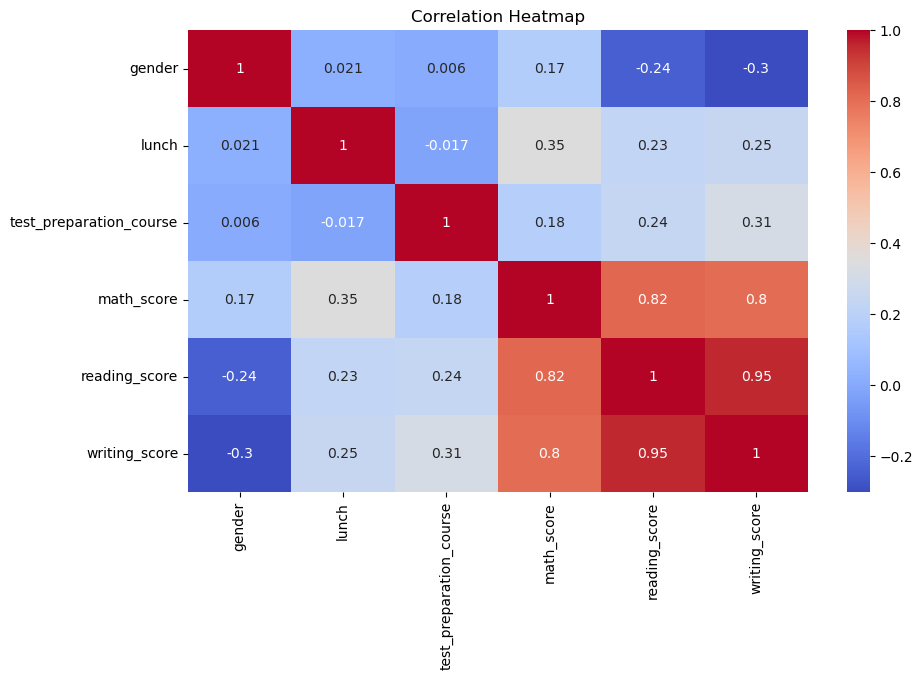

In [10]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

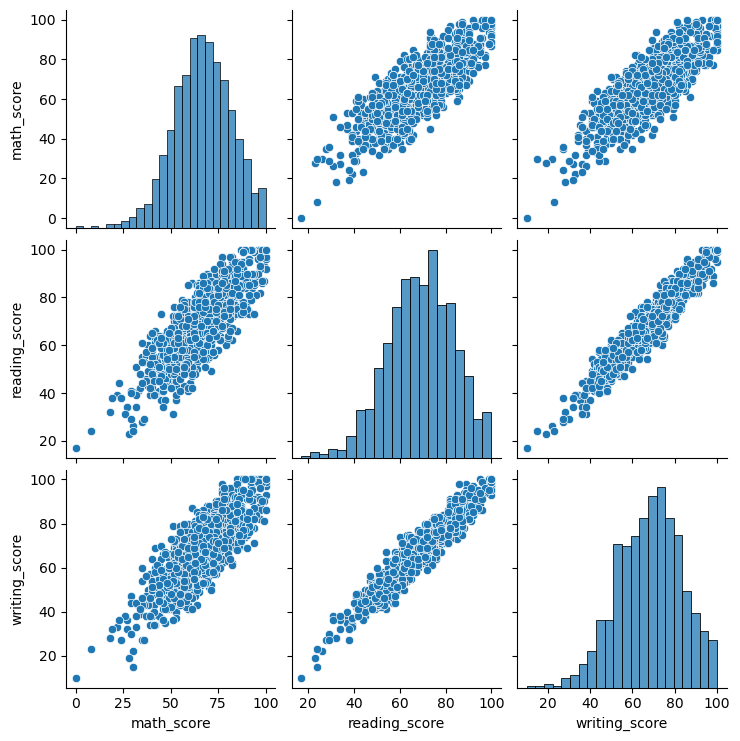

In [12]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df[['math_score', 'reading_score', 'writing_score']])
plt.show()

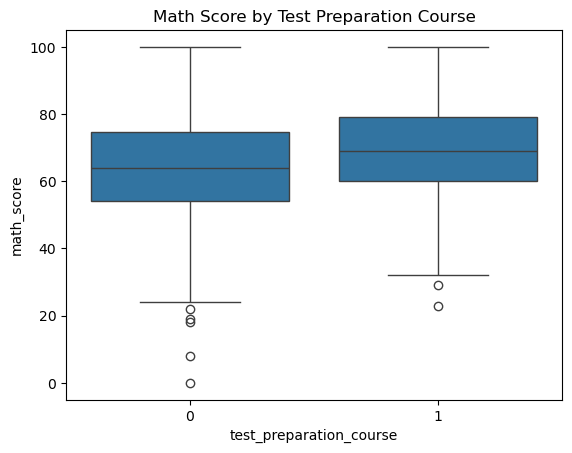

In [13]:
sns.boxplot(x='test_preparation_course', y='math_score', data=df)
plt.title("Math Score by Test Preparation Course")
plt.show()

In [14]:
# Feature Engineering
# Average score
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
df['average_score']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: average_score, Length: 1000, dtype: float64

In [15]:
df.head(3)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,72.666667
1,0,group C,some college,1,1,69,90,88,82.333333
2,0,group B,master's degree,1,0,90,95,93,92.666667


In [16]:
# Model Building
features = ['gender', 'lunch', 'test_preparation_course']
target = 'average_score'

In [17]:
X = df[features]
y = df[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Absolute Error: 11.086187451359137
R-squared: 0.07419580892670363


### Key Takeaways

1. Subject scores are strongly interrelated, especially reading and writing.

2. Test preparation and lunch type have measurable, though smaller, impacts.

3. Gender has a slight negative correlation with scores

### Insight and Conclusion

- Based on my model’s R² score (7.4%) and a relatively high MAE (11.086), we can conclude that demographic and support variables (like gender, lunch, and test preparation) have a modest influence on students' academic performance.

- This aligns with the correlation heatmap, where these variables show weak to moderate correlation with student scores.

- In contrast, subject scores (math, reading, writing) are strongly correlated with each other — suggesting student ability plays a bigger role than background factors alone.